In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('ds-programming-test/train_set.csv')

C:\Users\manue\AppData\Local\Temp\ipykernel_4652\4185404140.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ds-programming-test/train_set.csv')


In [4]:
df.shape

(700000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 74.8+ MB


In [6]:
df.isna().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
dtype: int64

In [7]:
sina = df[df['start_lat'].isna()]
sina['start_station'].unique()

array([4285, 4286, 3000], dtype=int64)

In [8]:
estacion3000lat= df.loc[df['start_station']==3000]['start_lat'].max() 
estacion3000long= df.loc[df['start_station']==3000]['start_lon'].min()

In [9]:
estacion3000lat

34.02589

In [10]:
estacion3000long

-118.23822

In [11]:
df.loc[(df['start_station'] == 3000), 'start_lat'] = 34.02589

df.loc[(df['start_station'] == 3000), 'start_lon'] = -118.23822


In [12]:

df.loc[(df['end_station'] == 3000), 'end_lat'] = 34.02589

df.loc[(df['end_station'] == 3000), 'end_lon'] = -118.23822

In [13]:
df.dropna(inplace = True)

In [14]:
df.set_index('trip_id', inplace = True)

In [15]:
df.isna().sum()

duration               0
start_time             0
end_time               0
start_lat              0
start_lon              0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
start_station          0
end_station            0
dtype: int64

In [16]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### Exploracion

In [17]:
df['start_time'].min()

Timestamp('2016-10-01 00:48:00')

In [18]:
df['start_time'].max()

Timestamp('2021-12-31 22:57:00')

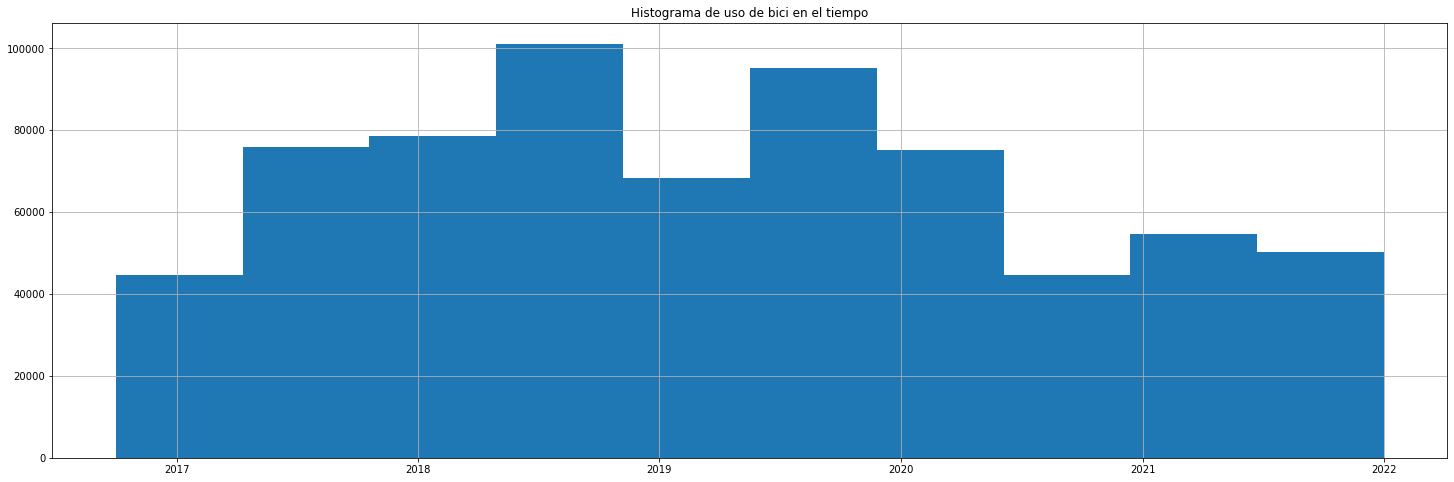

In [19]:
(df['start_time']).hist(figsize = (25,8))
plt.title('Histograma de uso de bici en el tiempo')
plt.show()

In [20]:
df2 = df[df['start_time'] > '2021-01-01 11:20:00']

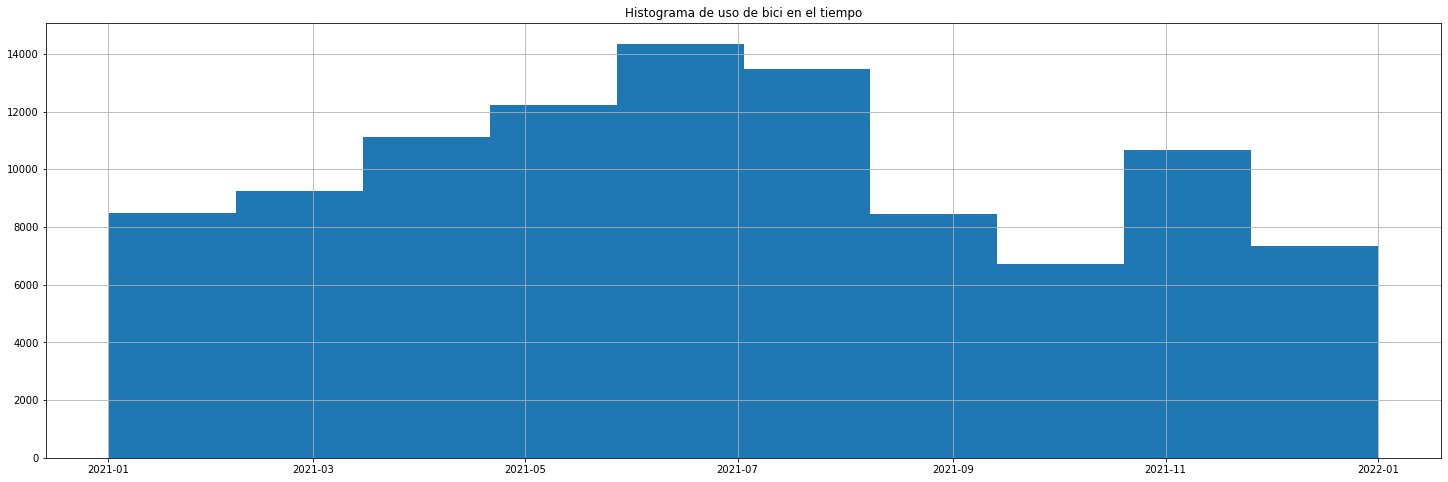

In [21]:
(df2['start_time']).hist(figsize = (25,8))
plt.title('Histograma de uso de bici en el tiempo')
plt.show()

Es posible observar que en el 2021, julio es cuando hay la mayor cantidad de uso del servicio, y en el mes de septiembre va disminuyendo. Durante la primer mitad del anio la demanda es mas alta

In [22]:
df['mes_inicio']=df['start_time'].dt.month_name()

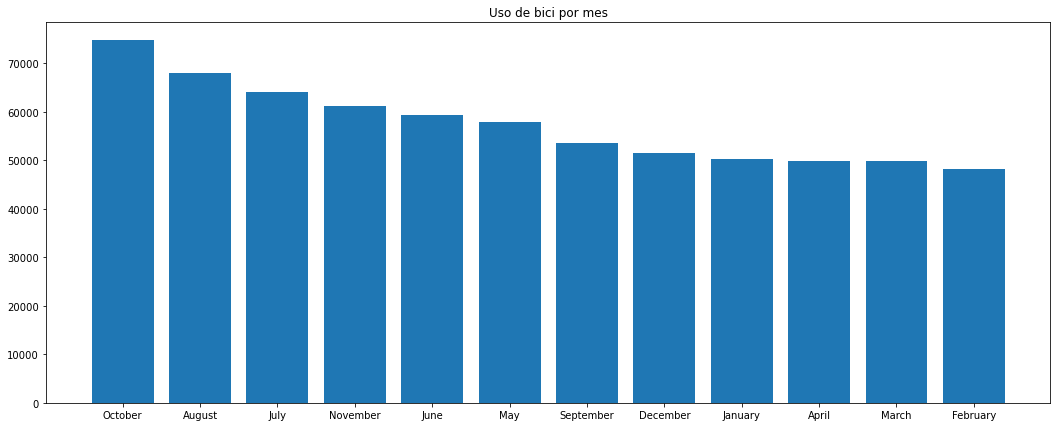

In [23]:
plt.figure(figsize=(18,7))
plt.bar(df['mes_inicio'].value_counts().index,df['mes_inicio'].value_counts().values)
plt.title('Uso de bici por mes')
plt.show()

Al ver el comportamiento con todos los anios,es posiblem ver que Octubre es donde hay la mayor demanda,y los meses de Diciembre, Enero, Febrero, Abril y Marzo hay la menor demanda

In [24]:
df['dia_inicio']=df['start_time'].dt.day_name()

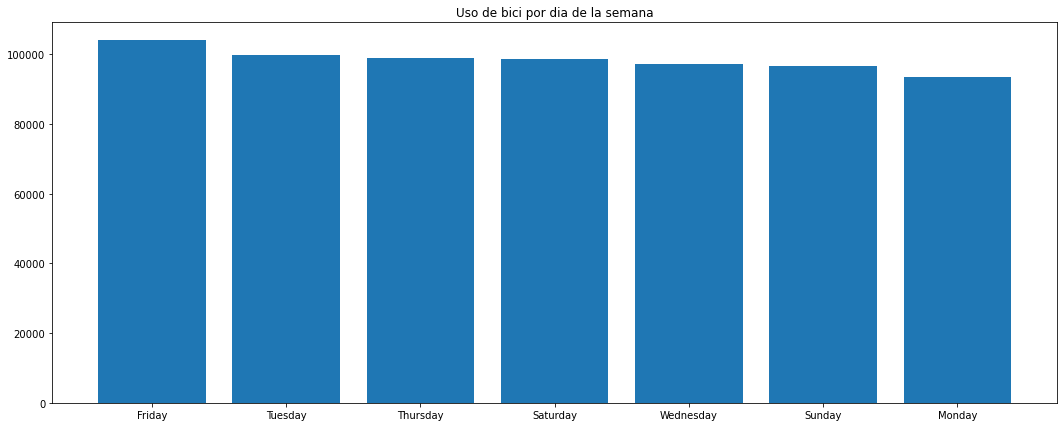

In [25]:
plt.figure(figsize=(18,7))
plt.bar(df['dia_inicio'].value_counts().index,df['dia_inicio'].value_counts().values)
plt.title('Uso de bici por dia de la semana')
plt.show()

En el dia viernes hay un poco mas de demanda con respecto a los otros dias

In [26]:
df['hora']= df['start_time'].dt.round('H')
df['hora']=pd.to_datetime(df['hora'],format= '%H:%M:%S' ).dt.time

In [27]:
pd.plotting.register_matplotlib_converters()

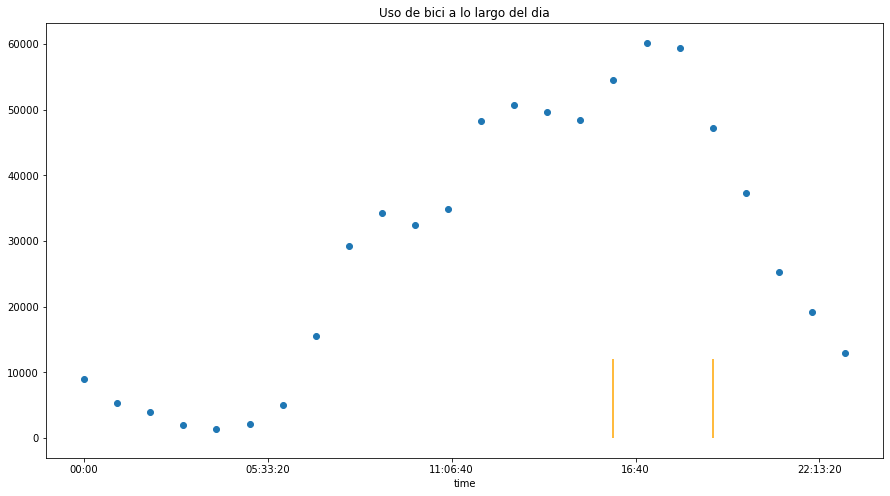

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(df['hora'].value_counts().index,df['hora'].value_counts().values)
plt.vlines(x='16:00:00',ymin=0,ymax=12000,color='orange')
plt.vlines(x='19:00:00',ymin=0,ymax=12000,color='orange')
plt.title('Uso de bici a lo largo del dia')
plt.show()

El pico de uso de bicis se encuentra entre las 4pm y las 7pm

In [29]:
dfAnual = df[df['passholder_type'] == 'Annual Pass']

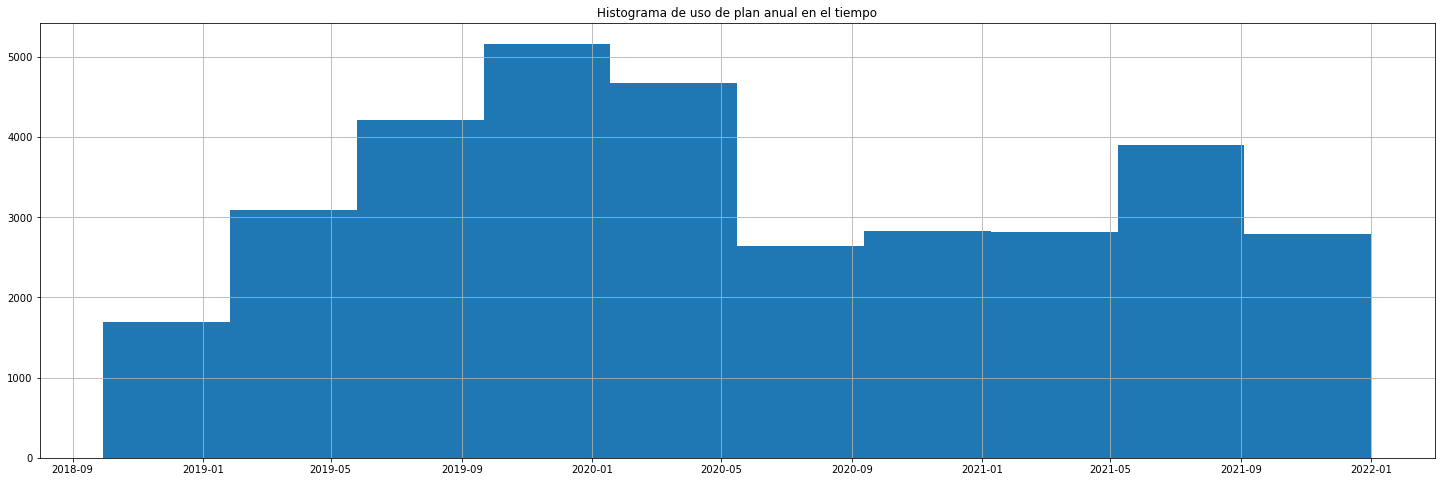

In [30]:
(dfAnual['start_time']).hist(figsize = (25,8))
plt.title('Histograma de uso de plan anual en el tiempo')
plt.show()

El uso del plan anual se ha mantendio estable desde mayo del 2020 hasta enero del 2022, no se ve una alza en su uso

In [31]:
df = df.drop(df[df.passholder_type == 'Testing'].index)

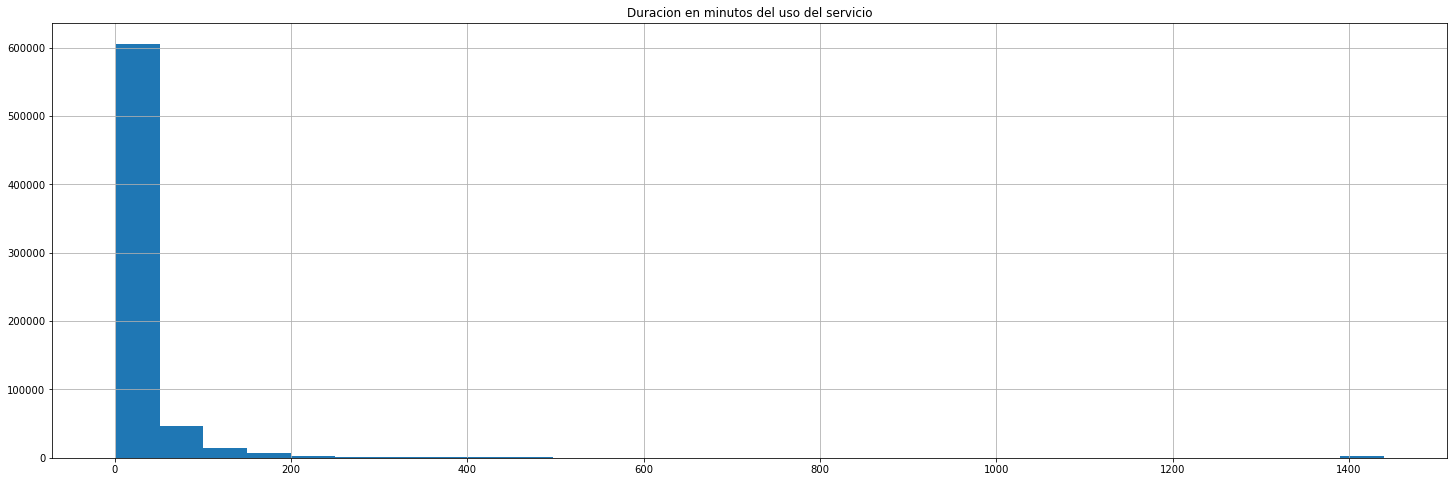

In [32]:
plt.figure(figsize=(25,8))
df.duration.hist(bins=29)
plt.title('Duracion en minutos del uso del servicio')
plt.show()

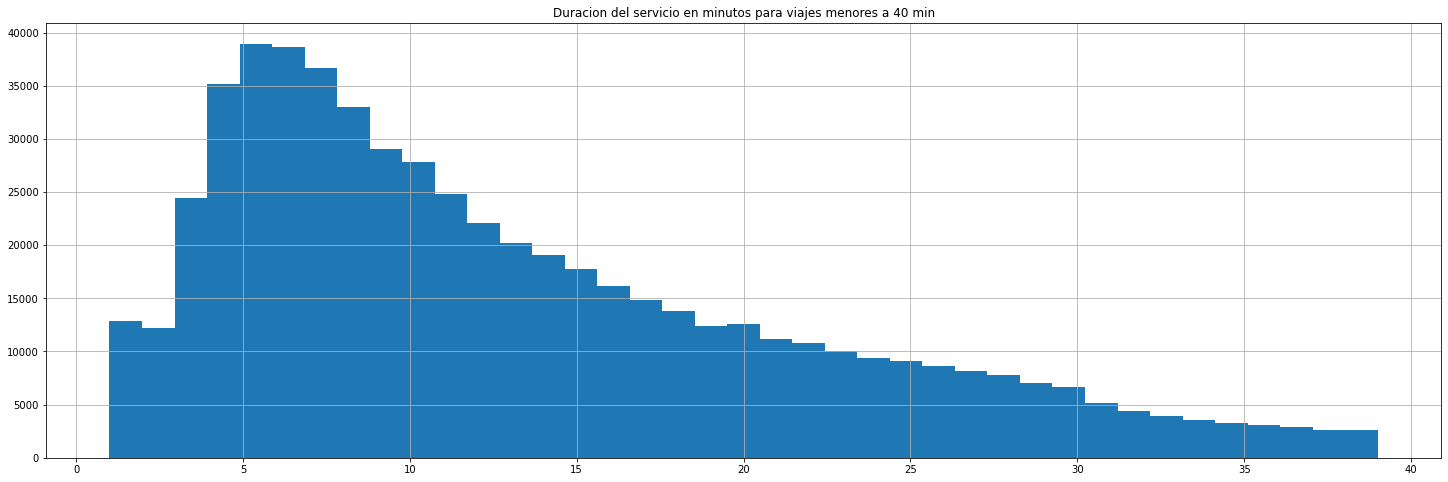

In [33]:
plt.figure(figsize=(25,8))
df.loc[df['duration']<40].duration.hist(bins=39)
plt.title('Duracion del servicio en minutos para viajes menores a 40 min')
plt.show()

In [34]:
df['duration']=df['duration'].clip(upper=40)

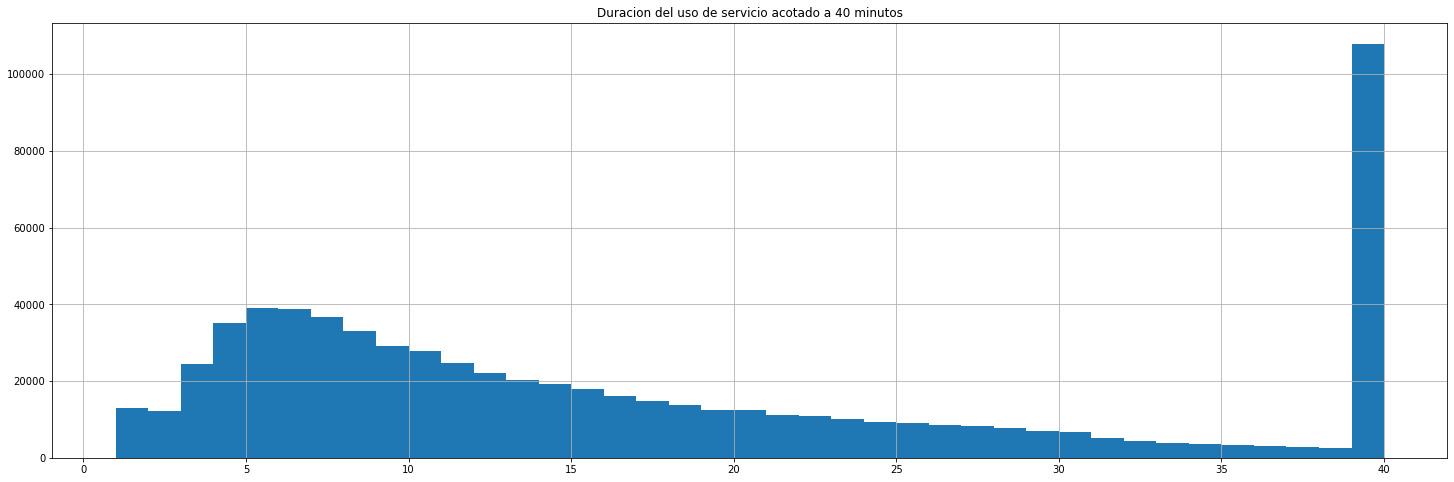

In [35]:
plt.figure(figsize=(25,8))
df.duration.hist(bins=39)
plt.title('Duracion del uso de servicio acotado a 40 minutos')
plt.show()

# Modelo

In [36]:
df=df.drop(columns=['plan_duration'])

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
df['passholder_type']= label_encoder.fit_transform(df['passholder_type'])
  
df['passholder_type'].unique()

array([4, 2, 3, 0, 1])

In [38]:
df['trip_route_category']= label_encoder.fit_transform(df['trip_route_category'])
df['mes_inicio']= label_encoder.fit_transform(df['mes_inicio'])
df['dia_inicio']= label_encoder.fit_transform(df['dia_inicio'])

In [39]:
y=df['passholder_type']
X=df.drop(columns=['bike_id','hora','start_time','end_time','passholder_type'])

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [42]:
from sklearn.tree import DecisionTreeRegressor 
  
# Modelo
tree = DecisionTreeRegressor(random_state = 42) 
  
# Entrenamiento del modelo 
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
# Predicción del modelo
y_tree = tree.predict(X_test)

#cm_tree = confusion_matrix(y_test, y_tree)

Feature: 0, Score: 0.30054
Feature: 1, Score: 0.09738
Feature: 2, Score: 0.07207
Feature: 3, Score: 0.06239
Feature: 4, Score: 0.07190
Feature: 5, Score: 0.01516
Feature: 6, Score: 0.06275
Feature: 7, Score: 0.06442
Feature: 8, Score: 0.16506
Feature: 9, Score: 0.08833


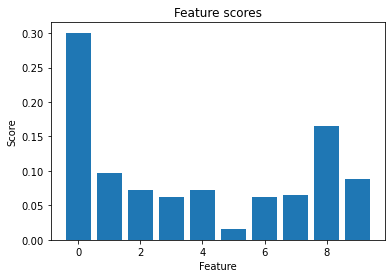

In [44]:
#Importancia de las variables
importance = tree.feature_importances_

# Resumen 
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Visualización de importancia
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature scores')
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred = tree_clf.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

In [48]:
cm_forest = confusion_matrix(y_test, y_pred)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29     10111
           1       0.13      0.16      0.15      3469
           2       0.74      0.73      0.74    117711
           3       0.25      0.25      0.25     12490
           4       0.58      0.57      0.58     62757

    accuracy                           0.62    206538
   macro avg       0.40      0.41      0.40    206538
weighted avg       0.63      0.62      0.63    206538



0 - Annual Passs, 1- Flex Pass, 2 - Monthly Pass, 3 - One Day Pass, 4 - Walk-up

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688457 entries, 101750280 to 167744702
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   duration             688457 non-null  int64  
 1   start_lat            688457 non-null  float64
 2   start_lon            688457 non-null  float64
 3   end_lat              688457 non-null  float64
 4   end_lon              688457 non-null  float64
 5   trip_route_category  688457 non-null  int32  
 6   start_station        688457 non-null  int64  
 7   end_station          688457 non-null  int64  
 8   mes_inicio           688457 non-null  int32  
 9   dia_inicio           688457 non-null  int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 49.9 MB


## Modelo 2

In [51]:
X=X.drop(columns=['trip_route_category'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [53]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = tree_clf.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.31      0.29     10111
           1       0.13      0.16      0.14      3469
           2       0.74      0.73      0.74    117711
           3       0.25      0.25      0.25     12490
           4       0.57      0.58      0.58     62757

    accuracy                           0.62    206538
   macro avg       0.40      0.41      0.40    206538
weighted avg       0.63      0.62      0.63    206538



# Usando datos nuevos

In [56]:
df_nuevos = pd.read_csv('ds-programming-test/test_set.csv')

C:\Users\manue\AppData\Local\Temp\ipykernel_4652\28155307.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nuevos = pd.read_csv('ds-programming-test/test_set.csv')


In [57]:
df_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569886 entries, 0 to 569885
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              569886 non-null  int64  
 1   duration             569886 non-null  int64  
 2   start_time           569886 non-null  object 
 3   end_time             569886 non-null  object 
 4   start_lat            565264 non-null  float64
 5   start_lon            565264 non-null  float64
 6   end_lat              554995 non-null  float64
 7   end_lon              554995 non-null  float64
 8   bike_id              569886 non-null  object 
 9   trip_route_category  569886 non-null  object 
 10  start_station        569886 non-null  int64  
 11  end_station          569886 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 52.2+ MB


In [58]:
df_nuevos['start_time'] = pd.to_datetime(df_nuevos['start_time'])
df_nuevos['end_time'] = pd.to_datetime(df_nuevos['end_time'])

In [60]:
df_nuevos['mes_inicio']=df_nuevos['start_time'].dt.month_name()
df_nuevos['dia_inicio']=df_nuevos['start_time'].dt.day_name()

In [61]:
df_nuevos['mes_inicio']= label_encoder.fit_transform(df_nuevos['mes_inicio'])
df_nuevos['dia_inicio']= label_encoder.fit_transform(df_nuevos['dia_inicio'])

In [62]:
sina = df_nuevos[df_nuevos['start_lat'].isna()]
sina['start_station'].unique()

array([3000, 4285, 4286], dtype=int64)

In [63]:
sinaEnd = df_nuevos[df_nuevos['end_lat'].isna()]
sinaEnd['end_station'].unique()

array([3000, 4285, 4286], dtype=int64)

In [64]:
estacion3000lat= df_nuevos.loc[df_nuevos['start_station']==3000]['start_lat'].max() 
estacion3000long= df_nuevos.loc[df_nuevos['start_station']==3000]['start_lon'].min()

In [ ]:
estacion3000lat

In [ ]:
estacion3000long

In [65]:
df_nuevos.loc[(df_nuevos['start_station'] == 3000), 'start_lat'] = 34.02589
df_nuevos.loc[(df_nuevos['start_station'] == 3000), 'start_lon'] = -118.23822

In [66]:
df_nuevos.loc[(df_nuevos['end_station'] == 3000), 'end_lat'] = 34.02589
df_nuevos.loc[(df_nuevos['end_station'] == 3000), 'end_lon'] = -118.23822

In [67]:
estacion4285lat= df.loc[df['start_station']==4285]['start_lat'].max() 
estacion4285long= df.loc[df['start_station']==4285]['start_lon'].min()
print(estacion4285lat, estacion4285long)

nan nan


In [68]:
df_nuevos.loc[(df_nuevos['start_station'] == 4285), 'start_lat'] = 0
df_nuevos.loc[(df_nuevos['start_station'] == 4285), 'start_lon'] = 0

In [69]:
df_nuevos.loc[(df_nuevos['end_station'] == 4285), 'end_lat'] = 0
df_nuevos.loc[(df_nuevos['end_station'] == 4285), 'end_lon'] = 0

In [70]:
estacion4286lat= df.loc[df['start_station']==4286]['start_lat'].max() 
estacion4286long= df.loc[df['start_station']==4286]['start_lon'].min()
print(estacion4286lat, estacion4286long)

nan nan


In [71]:
df_nuevos.loc[(df_nuevos['start_station'] == 4286), 'start_lat'] = 0
df_nuevos.loc[(df_nuevos['start_station'] == 4286), 'start_lon'] = 0

In [72]:
df_nuevos.loc[(df_nuevos['end_station'] == 4286), 'end_lat'] = 0
df_nuevos.loc[(df_nuevos['end_station'] == 4286), 'end_lon'] = 0

In [74]:
X=df_nuevos.drop(columns=['trip_id','bike_id','start_time','end_time','trip_route_category'])

In [76]:
y_pred = tree_clf.predict(X)

In [78]:
prediccion = pd.DataFrame(y_pred, columns = ['passholder_type'])

In [80]:
prediccion.loc[prediccion['passholder_type']==3, 'passholder_type'] = 'One Day Pass'
prediccion.loc[prediccion['passholder_type']==0, 'passholder_type'] = 'Annual Pass'
prediccion.loc[prediccion['passholder_type']==1, 'passholder_type'] = 'Flex Pass'
prediccion.loc[prediccion['passholder_type']==2, 'passholder_type'] = 'Monthly Pass'
prediccion.loc[prediccion['passholder_type']==4, 'passholder_type'] = 'Walk-up'

In [81]:
df['passholder_type'].unique()

array([4, 2, 3, 0, 1])

0 - Annual Passs, 1- Flex Pass, 2 - Monthly Pass, 3 - One Day Pass, 4 - Walk-up

In [82]:
df_final = pd.read_csv('ds-programming-test/test_set.csv')

C:\Users\manue\AppData\Local\Temp\ipykernel_4652\2646420524.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('ds-programming-test/test_set.csv')


In [84]:
df_join = df_final.join(prediccion)

In [85]:
df_submit = df_join[['trip_id', 'passholder_type']]

In [86]:
df_submit = df_submit.set_index('trip_id')

In [87]:
df_submit.to_csv('submission_nam.csv')